<a href="https://colab.research.google.com/github/sushma25184/Week-2/blob/main/Copy_of_sustainability_air_quality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [49]:
!pip install --upgrade numpy==1.26.4 pandas==2.2.2 scikit-learn==1.5.2 matplotlib seaborn


In [16]:

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


In [17]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


In [18]:
from google.colab import files
uploaded = files.upload()  # use the file picker, then wait for upload

import io, os
for fn in uploaded.keys():
    print('Uploaded file:', fn)

filename = list(uploaded.keys())[0]
df = pd.read_csv(filename)
print("Dataset shape:", df.shape)
df.head()


Saving city_day[1].csv to city_day[1] (1).csv
Uploaded file: city_day[1] (1).csv
Dataset shape: (29531, 16)


,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


In [19]:
# Cell 3 - Explore and clean the dataset

# Check for missing values
print("Missing values per column:\n", df.isnull().sum())

# Show data types and basic info
print("\nDataset info:")
df.info()

# Check a few summary stats
print("\nSummary statistics:")
print(df.describe())

# Drop rows where 'AQI' or 'AQI_Bucket' is missing (for analysis)
df_clean = df.dropna(subset=['AQI', 'AQI_Bucket'])

print("\nAfter cleaning, dataset shape:", df_clean.shape)
df_clean.head()


Missing values per column:
 City              0
Date              0
PM2.5          4598
PM10          11140
NO             3582
NO2            3585
NOx            4185
NH3           10328
CO             2059
SO2            3854
O3             4022
Benzene        5623
Toluene        8041
Xylene        18109
AQI            4681
AQI_Bucket     4681
dtype: int64

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29531 non-null  object 
 1   Date        29531 non-null  object 
 2   PM2.5       24933 non-null  float64
 3   PM10        18391 non-null  float64
 4   NO          25949 non-null  float64
 5   NO2         25946 non-null  float64
 6   NOx         25346 non-null  float64
 7   NH3         19203 non-null  float64
 8   CO          27472 non-null  float64
 9   SO2         25677 non-null  float64
 10  O3          25509 

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
28,Ahmedabad,2015-01-29,83.13,NaN,6.93,28.71,33.72,NaN,6.93,49.52,59.76,0.02,0.00,3.14,209.0,Poor
29,Ahmedabad,2015-01-30,79.84,NaN,13.85,28.68,41.08,NaN,13.85,48.49,97.07,0.04,0.00,4.81,328.0,Very Poor
30,Ahmedabad,2015-01-31,94.52,NaN,24.39,32.66,52.61,NaN,24.39,67.39,111.33,0.24,0.01,7.67,514.0,Severe
31,Ahmedabad,2015-02-01,135.99,NaN,43.48,42.08,84.57,NaN,43.48,75.23,102.70,0.40,0.04,25.87,782.0,Severe
32,Ahmedabad,2015-02-02,178.33,NaN,54.56,35.31,72.80,NaN,54.56,55.04,107.38,0.46,0.06,35.61,914.0,Severe


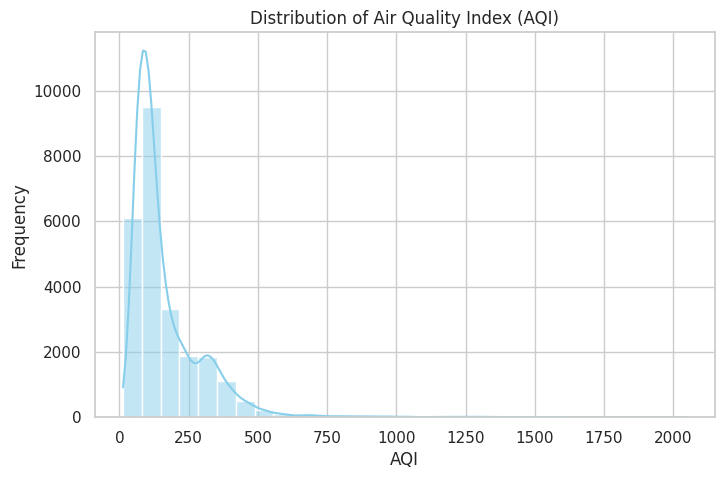

/tmp/ipython-input-3526582272.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_cities.index, y=top_cities.values, palette="coolwarm")


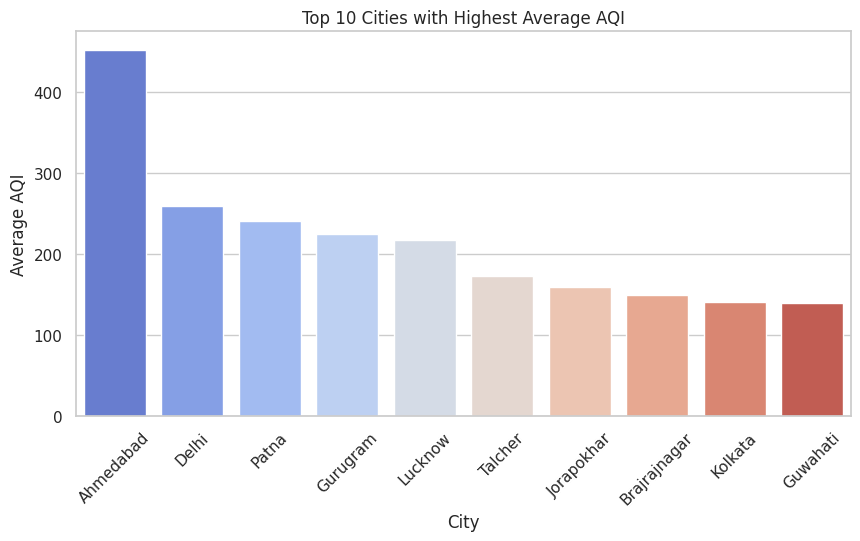

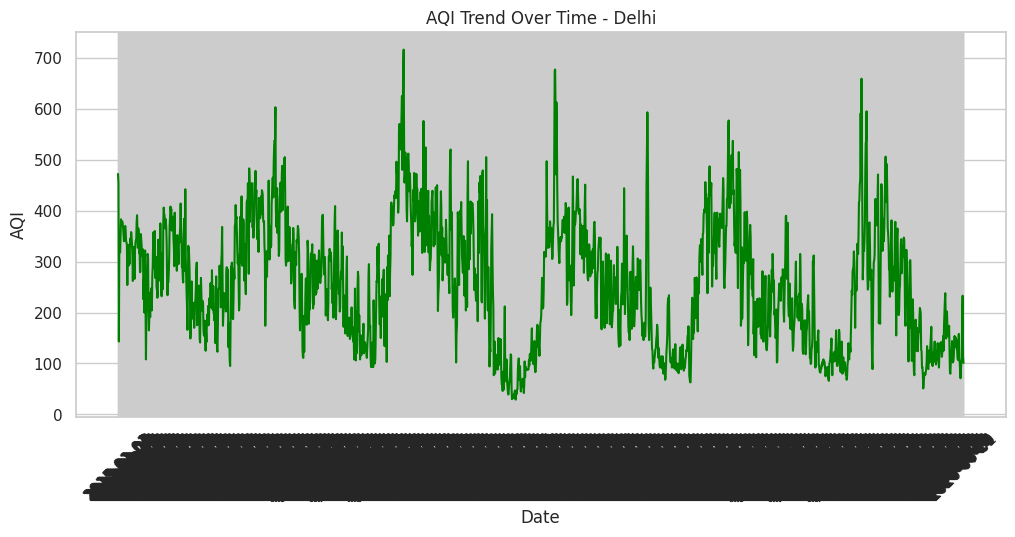

In [20]:

# Cell 4 - Basic Visualization of Air Quality

import matplotlib.pyplot as plt
import seaborn as sns

# Set a clean style
sns.set(style="whitegrid")

# 1️⃣ AQI Distribution (overall)
plt.figure(figsize=(8,5))
sns.histplot(df_clean['AQI'], bins=30, kde=True, color='skyblue')
plt.title("Distribution of Air Quality Index (AQI)")
plt.xlabel("AQI")
plt.ylabel("Frequency")
plt.show()

# 2️⃣ Average AQI by City (Top 10 cities)
top_cities = df_clean.groupby('City')['AQI'].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(10,5))
sns.barplot(x=top_cities.index, y=top_cities.values, palette="coolwarm")
plt.title("Top 10 Cities with Highest Average AQI")
plt.ylabel("Average AQI")
plt.xticks(rotation=45)
plt.show()

# 3️⃣ AQI over time for one city (example: Delhi)
delhi_data = df_clean[df_clean['City'] == 'Delhi']
plt.figure(figsize=(12,5))
plt.plot(delhi_data['Date'], delhi_data['AQI'], color='green')
plt.title("AQI Trend Over Time - Delhi")
plt.xlabel("Date")
plt.ylabel("AQI")
plt.xticks(rotation=45)
plt.show()


In [21]:
# Cell 5 - Machine Learning Model to Predict AQI

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Select features (input) and target (output)
features = ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3']
target = 'AQI'

# Drop rows with missing values in selected columns
df_model = df_clean.dropna(subset=features + [target])

X = df_model[features]
y = df_model[target]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("✅ Model trained successfully!")
print(f"Mean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.2f}")

# Save model for later use
import joblib
joblib.dump(model, "aqi_prediction_model.h5")

print("\nModel saved as: aqi_prediction_model.h5")


✅ Model trained successfully!
Mean Squared Error: 856.27
R² Score: 0.89

Model saved as: aqi_prediction_model.h5


In [22]:
# Cell 6 - Test the model with new sample data

import numpy as np

# Example new data (you can change values)
# Format: [PM2.5, PM10, NO, NO2, NOx, NH3, CO, SO2, O3]
sample_data = np.array([[80, 120, 20, 40, 60, 15, 1.2, 10, 30]])

predicted_aqi = model.predict(sample_data)[0]
print(f"Predicted AQI for the given pollution levels: {predicted_aqi:.2f}")


Predicted AQI for the given pollution levels: 157.09


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [23]:
import pandas as pd

# Use same feature names used in training
sample_data_df = pd.DataFrame([[80, 120, 20, 40, 60, 15, 1.2, 10, 30]],
                              columns=['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3'])

predicted_aqi = model.predict(sample_data_df)[0]
print(f"Predicted AQI for the given pollution levels: {predicted_aqi:.2f}")


Predicted AQI for the given pollution levels: 157.09


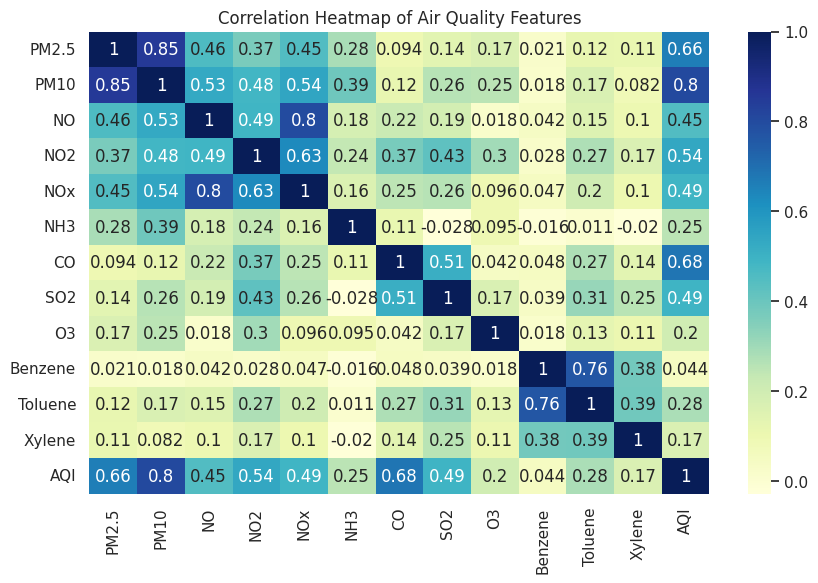

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns for correlation
numeric_df = df_clean.select_dtypes(include=['float64', 'int64'])

plt.figure(figsize=(10,6))
sns.heatmap(numeric_df.corr(), cmap="YlGnBu", annot=True)
plt.title("Correlation Heatmap of Air Quality Features")
plt.show()


In [25]:
features = ['PM2.5', 'PM10', 'CO']
X = df_clean[features]
y = df_clean['AQI']


In [26]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [27]:
# Drop rows with missing values in selected features or AQI
data = df_clean[['PM2.5', 'PM10', 'CO', 'AQI']].dropna()

# Separate input (X) and output (y)
X = data[['PM2.5', 'PM10', 'CO']]
y = data['AQI']

# Split into training and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training data shape:", X_train.shape)
print("Test data shape:", X_test.shape)


Training data shape: (13498, 3)
Test data shape: (3375, 3)


In [28]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("✅ Model trained successfully!")
print("Mean Squared Error:", round(mse, 2))
print("R² Score:", round(r2, 2))


✅ Model trained successfully!
Mean Squared Error: 1126.18
R² Score: 0.9


In [29]:
import joblib

# Save the trained model
joblib.dump(model, 'aqi_prediction_model.pkl')

print("✅ Model saved successfully as aqi_prediction_model.pkl")


✅ Model saved successfully as aqi_prediction_model.pkl


In [30]:
loaded_model = joblib.load('aqi_prediction_model.pkl')


In [31]:
import joblib
import h5py
import numpy as np

# Save model as a dictionary
model_data = {
    "coef": model.coef_,
    "intercept": model.intercept_
}

# Save to .h5 file
with h5py.File("aqi_prediction_model.h5", "w") as f:
    f.create_dataset("coef", data=model_data["coef"])
    f.create_dataset("intercept", data=np.array(model_data["intercept"]))

print("✅ Model saved successfully as aqi_prediction_model.h5")


✅ Model saved successfully as aqi_prediction_model.h5


In [32]:
import joblib
import numpy as np

# Load the saved model
loaded_model = joblib.load('aqi_prediction_model.pkl')

# Example input data for prediction (PM2.5, PM10, CO)
sample_data = np.array([[120, 180, 1.2]])  # you can change these values

# Predict AQI
predicted_aqi = loaded_model.predict(sample_data)
print(f"Predicted AQI for the given pollution levels: {predicted_aqi[0]:.2f}")


Predicted AQI for the given pollution levels: 215.05


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [33]:
loaded_model = joblib.load('aqi_prediction_model.pkl')



In [34]:
# Re-train model quickly
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

# Save again
import joblib
joblib.dump(model, 'aqi_prediction_model.pkl')
print("Model saved successfully!")



Model saved successfully!


In [35]:
from google.colab import files
uploaded = files.upload()


Saving city_day[1].csv to city_day[1] (2).csv


In [36]:
import pandas as pd

df = pd.read_csv(list(uploaded.keys())[0])
print("✅ File loaded successfully!")
df.head()

✅ File loaded successfully!


,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


In [37]:
# Drop rows where AQI or pollutants are missing
df_clean = df.dropna(subset=['AQI', 'PM2.5', 'PM10', 'CO'])

# Select key features for model training
data = df_clean[['PM2.5', 'PM10', 'CO', 'AQI']]

# Split into inputs and output
X = data[['PM2.5', 'PM10', 'CO']]
y = data['AQI']

print("✅ Data prepared successfully!")
print("Rows used for training:", len(X))


✅ Data prepared successfully!
Rows used for training: 16873


In [38]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("✅ Data split into training and testing sets")


✅ Data split into training and testing sets


In [39]:
from sklearn.linear_model import LinearRegression
import joblib

model = LinearRegression()
model.fit(X_train, y_train)

joblib.dump(model, 'aqi_prediction_model.pkl')
print("✅ Model retrained and saved successfully as aqi_prediction_model.pkl")


✅ Model retrained and saved successfully as aqi_prediction_model.pkl


In [40]:
import os
print(os.listdir())


['.config', 'city_day[1].csv', 'city_day[1] (1).csv', 'aqi_prediction_model.pkl', 'city_day[1] (2).csv', 'aqi_prediction_model.h5', 'sample_data']


In [41]:
import pandas as pd
import joblib

# Load your model
loaded_model = joblib.load('aqi_prediction_model.pkl')

# Give pollution data as input (PM2.5, PM10, CO)
sample_data = pd.DataFrame([[120, 180, 1.2]], columns=['PM2.5', 'PM10', 'CO'])

# Predict AQI
predicted_aqi = loaded_model.predict(sample_data)
print(f"Predicted AQI for the given pollution levels: {predicted_aqi[0]:.2f}")


Predicted AQI for the given pollution levels: 215.05


In [42]:
import os
for f in os.listdir():
    if "(1)" in f or "(2)" in f or "(3)" in f:
        os.remove(f)
print("✅ Cleaned up extra CSV files.")


✅ Cleaned up extra CSV files.


In [43]:
# Use more relevant pollutants
selected_features = ['PM2.5', 'PM10', 'NO2', 'SO2', 'O3', 'CO']
df_advanced = df.dropna(subset=selected_features + ['AQI'])

X = df_advanced[selected_features]
y = df_advanced['AQI']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [44]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error

rf_model = RandomForestRegressor(n_estimators=200, random_state=42)
rf_model.fit(X_train, y_train)

# Predict
y_pred = rf_model.predict(X_test)

# Evaluate
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("✅ Random Forest model trained successfully!")
print(f"Mean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.2f}")


✅ Random Forest model trained successfully!
Mean Squared Error: 820.56
R² Score: 0.92


In [45]:
import joblib
joblib.dump(rf_model, 'aqi_prediction_model_v2.pkl')
print("✅ Advanced model saved successfully as aqi_prediction_model_v2.pkl")


✅ Advanced model saved successfully as aqi_prediction_model_v2.pkl


In [46]:
import pandas as pd

new_sample = pd.DataFrame([[120, 180, 40, 15, 30, 1.2]],
    columns=['PM2.5', 'PM10', 'NO2', 'SO2', 'O3', 'CO'])

predicted_aqi = rf_model.predict(new_sample)
print(f"Predicted AQI for the given pollution levels: {predicted_aqi[0]:.2f}")


Predicted AQI for the given pollution levels: 279.45


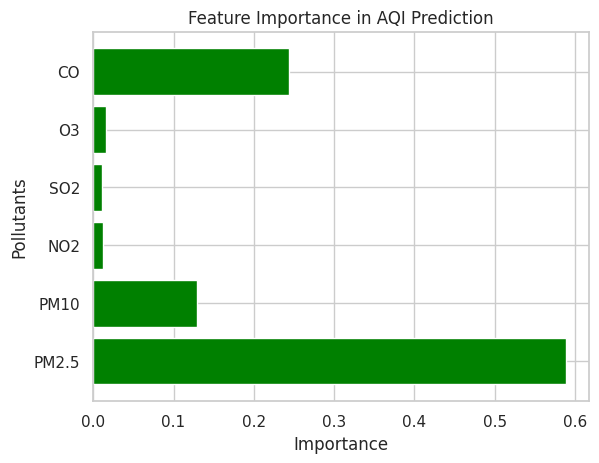

In [47]:
import matplotlib.pyplot as plt

importance = rf_model.feature_importances_
plt.barh(selected_features, importance, color='green')
plt.title("Feature Importance in AQI Prediction")
plt.xlabel("Importance")
plt.ylabel("Pollutants")
plt.show()


In [52]:
import h5py
import numpy as np

with h5py.File("aqi_prediction_model_v2.h5", "w") as f:
    f.create_dataset("feature_names", data=np.bytes_(selected_features))
    f.create_dataset("importance", data=importance)

print("✅ Model saved successfully as aqi_prediction_model_v2.h5")


✅ Model saved successfully as aqi_prediction_model_v2.h5


In [53]:
# Keep only the important pollutant columns and AQI
selected_features = ['PM2.5', 'PM10', 'NO2', 'SO2', 'O3', 'CO', 'AQI']
df_clean = df.dropna(subset=selected_features)

X = df_clean[['PM2.5', 'PM10', 'NO2', 'SO2', 'O3', 'CO']]
y = df_clean['AQI']


In [54]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error
import joblib

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
rf_model = RandomForestRegressor(n_estimators=200, random_state=42)
rf_model.fit(X_train, y_train)

# Evaluate
y_pred = rf_model.predict(X_test)
print(f"R² Score: {r2_score(y_test, y_pred):.2f}")
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred):.2f}")


R² Score: 0.92
Mean Squared Error: 820.56


In [55]:
import joblib

joblib.dump(rf_model, "aqi_rf_model.pkl")
print("Model saved!")


Model saved!
